In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.9,  rc={"lines.linewidth": 5})

In [3]:
# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

In [4]:
#define x grid:
x = np.linspace(-10,10,500)

# specify potential at grid points
V_x = np.zeros(shape=x.shape)

In [8]:
#Specify initial wave function at grid points:
@np.vectorize
def planeWave(x,k0):
    
    arg = np.complex(0,k0*x)
    
    return  np.exp(arg)


def wavePacket(x,kvals,avals=1):    
    psi_x0 = None
    if avals == 1:
        avals = np.ones(kvals.shape)
    for i,k in enumerate(kvals):
        if psi_x0 is None:
            psi_x0 = avals[i]*planeWave(x=x,k0=k)
        else:
            psi_x0 += avals[i]*planeWave(x=x,k0=k)
    return psi_x0

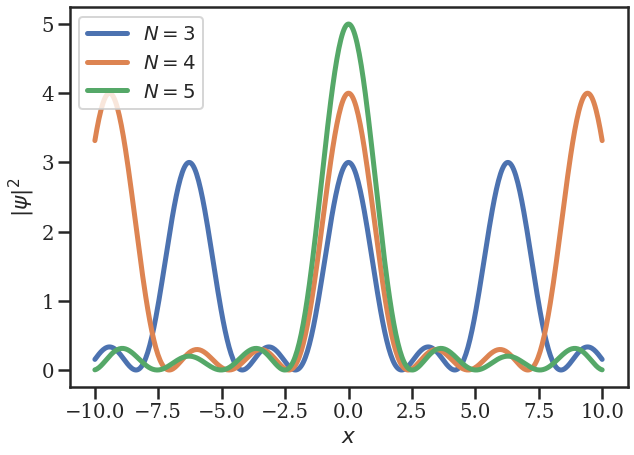

In [19]:
fig = plt.figure(figsize=(10,7))

kvals = np.linspace(-1,1,3)
plt.plot(x,np.abs(wavePacket(x=x,kvals=kvals))**2/len(kvals),linestyle='-',label=r'$N = %i$' %len(kvals))

kvals = np.linspace(-1,1,4)
plt.plot(x,np.abs(wavePacket(x=x,kvals=kvals))**2/len(kvals),linestyle='-',label=r'$N = %i$' %len(kvals))

kvals = np.linspace(-1,1,5)
plt.plot(x,np.abs(wavePacket(x=x,kvals=kvals))**2/len(kvals),linestyle='-',label=r'$N = %i$' %len(kvals))

# kvals = np.linspace(-1,1,10)
# plt.plot(x,np.abs(wavePacket(x=x,kvals=kvals))**2/len(kvals),linestyle='-',label=r'$N = %i$' %len(kvals))

plt.legend(loc='upper left')
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')
plt.savefig('planeWavePackets.png')
plt.show()